# Bethe potential

In [37]:
from utils import*
from blochwave import bloch;imp.reload(bloch)
from blochwave import bloch_pp as bl;imp.reload(bl)            # bloch rocking curve 
from EDutils import utilities as ut             # utilities
figs = (18,6)
%matplotlib inline

## Test

In [144]:
imp.reload(bloch)
args = dict(cif_file='dat/LTA.cif',u=[2,5,3],keV=200,v=1,thick=1000,Nmax=10)
b_bethe = bloch.Bloch(name='bethe',path='dat/bethe',solver='bethe',bethe_args=dict(ugS_max=0.001,Sgmax=0.01),**args)
b_part  = bloch.Bloch(name='part' ,path='dat/bethe',hkl=b_bethe.df_G.loc[b_bethe.df_G.strong==True].index.tolist(),**args)
b_full  = bloch.Bloch(name='full' ,path='dat/bethe',hkl=b_bethe.df_G.loc[~(b_bethe.df_G.strong=='?')].index.tolist(),**args)
# b_bethe.df_G[['Sw','Sg_eff','Ug','Ug_eff','strong','Ug/2KSg','I']]

 ...assembling 126x126 matrix and 189 weak beams...              
...diagonalization...
updated intensities
object saved
dat/bethe/bethe.pkl
object saved
dat/bethe/bethe.pkl
 ...assembling 126x126 matrix (structure factor shape : (41, 41, 41) ...             
...diagonalization...
updated intensities
object saved
dat/bethe/part.pkl
object saved
dat/bethe/part.pkl
 ...assembling 315x315 matrix (structure factor shape : (41, 41, 41) ...             
...diagonalization...
updated intensities
object saved
dat/bethe/full.pkl
object saved
dat/bethe/full.pkl


In [136]:
# b_bethe.df_G.loc[~(b_bethe.df_G.strong=='?')].index
# len(b_bethe.df_G.loc[b_bethe.df_G.strong==True].index.tolist())
# np.where(b_bethe.df_G.loc[b_bethe.df_G.strong].index==str((0,0,0)))
# print(b_full.df_G.index)
# print(b_bethe.df_G.loc[b_bethe.df_G.strong==True].index)
# b_bethe.df_G.sort_values('Swa')[['Sw','Sg_eff','Ug','Ug_eff']]
# df.columns

In [145]:
# b_bethe.set_thickness(thick=500)
# b_full.set_thickness(thick=500)
df = pd.merge(b_bethe.df_G,b_full.df_G,on='hkl',suffixes=('_bethe','_full'))
df.set_index('hkl',inplace=True)

# df.loc[b_bethe.df_G.strong==True,['S_bethe','S_full','I_bethe','I_full','Sw_full','Sg_eff','Ug_full','Ug_eff']]
df = pd.merge(df,b_part.df_G,on='hkl',suffixes=('','_part'))
df.rename(columns={'I':'I_part'},inplace=True)
df.set_index('hkl',inplace=True)
print(df.sort_values('I_full').loc[b_bethe.df_G.strong==True,['I_bethe','I_part','I_full']].to_string())

                   I_bethe        I_part        I_full
hkl                                                   
(-8, 9, -10)  2.730351e-07  1.413023e-07  1.388737e-07
(-7, -1, 6)   2.199203e-07  1.990977e-07  1.452084e-07
(-10, 9, -9)  7.583913e-08  1.947486e-07  1.490788e-07
(1, -6, 9)    4.867709e-07  3.610491e-07  4.707413e-07
(9, -8, 7)    7.519375e-07  6.794576e-07  5.206688e-07
(10, -9, 8)   5.799261e-07  5.854912e-07  5.689578e-07
(-3, 4, -5)   1.002213e-06  1.007823e-06  9.516494e-07
(7, -9, 10)   1.025102e-06  1.026906e-06  1.085581e-06
(8, -9, 9)    1.121636e-06  1.104149e-06  1.236657e-06
(1, 3, -6)    5.967147e-07  3.392556e-07  1.265316e-06
(5, 2, -7)    2.355694e-06  2.450142e-06  2.396167e-06
(0, -5, 8)    2.683672e-06  2.885125e-06  2.454404e-06
(5, -4, 3)    2.713139e-06  2.630762e-06  2.524333e-06
(-4, 5, -6)   2.146099e-06  2.109616e-06  2.574290e-06
(3, 4, -9)    2.003249e-06  1.719070e-06  2.633546e-06
(-10, 5, -2)  2.291949e-06  2.720250e-06  3.124629e-06
(-2, -3, 6

## 2 beam with weak beam 


In [22]:
u   = np.array([0.6, 0.9, 0.5 ])
u   = u/np.linalg.norm(u)
uvw=ut.get_uvw(u,osc=1,npts=30)
# Sargs=dict(cif_file='dat/LTA.cif',Smax=0.005,keV=200,Nmax=5,solve=True,opts='',v=0)
# name = 'test'
# rock = bl.Bloch_cont(path='dat/bethe/rocks/%s' %name,uvw=uvw,tag='',Sargs=Sargs,
#                      params=[],vals=[],
#                      frames=np.arange(len(uvw)) )

In [333]:
# rock.do('set_thickness', verbose=False,thick=500,v=0)
rock=ut.load_pkl('dat/bethe/rocks/test/rock_.pkl')
b = rock.load(11)
print(b.df_G.sort_values('I',ascending=False)[['Sw','I']].to_string())
hkl = b.df_G.sort_values('I',ascending=False).index

                       Sw             I
(0, 0, 0)   -5.702381e-15  7.905776e-01
(1, 1, -3)   8.799635e-05  1.125303e-01
(-2, 3, -3) -8.860617e-04  3.732755e-02
(4, -5, 4)   5.759629e-04  2.518983e-02
(-3, 2, 0)  -1.151160e-03  1.959598e-02
(3, -2, 0)  -1.151160e-03  8.448338e-03
(4, -1, -3) -1.240265e-03  2.402105e-03
(2, -3, 3)  -3.010171e-03  2.161399e-03
(5, -4, 1)   2.966278e-03  1.064461e-03
(-4, 2, 1)   4.825844e-03  2.082066e-04
(-1, -1, 3) -2.036112e-03  1.362787e-04
(-5, 1, 4)   1.904224e-03  9.535874e-05
(1, -3, 4)   3.321036e-03  8.503643e-05
(-2, -1, 4)  3.763789e-03  8.221916e-05
(-5, 5, -3) -4.162439e-03  7.297418e-05
(-2, 4, -5)  4.824735e-03  2.231110e-05
(-4, 1, 3)  -3.364373e-03  4.971277e-08


total number of beams:6


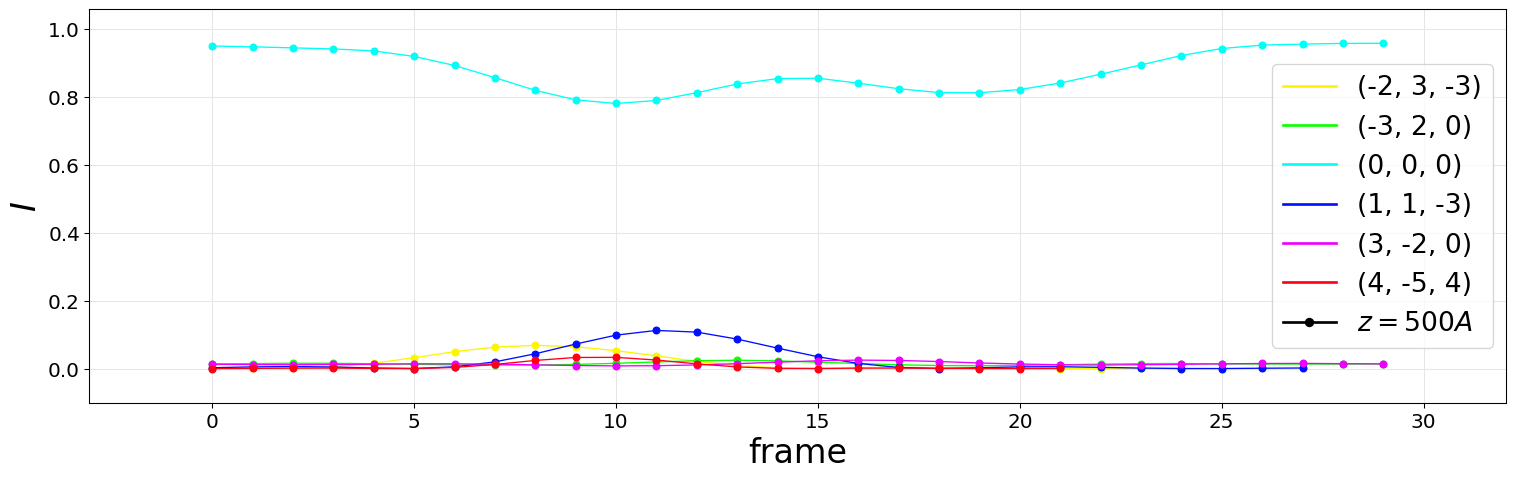

In [226]:
rock.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)
rock.plot_rocking(refl=hkl[:6],zs=[500],cmap='hsv',kin=False,figsize=figs,
                  #xylims=['x',-0.003,0.003],
                  x='Frame',opt='',opts='F');

### Single point comparison 

In [24]:
imp.reload(bloch)
Sargs = dict(cif_file='dat/LTA.cif',Smax=0,keV=200,Nmax=5,solve=True,u=uvw[11], path='dat/bethe/',v=1,opts='sv',thick=500)
b_three = bloch.Bloch(name='u3',hkl=hkl[:3].tolist(),**Sargs)
b_two   = bloch.Bloch(name='u2',hkl=hkl[:2].tolist(),**Sargs)
b_bethe = bloch.Bloch(name='u3_bethe',hkl=hkl[:3].tolist(),solver='bethe',bethe_args=dict(ugS_max=0.01,Sgmax=0.0001),**Sargs)
b_bethe.df_G[['Sw','Ug/2KSg','strong']]

NameError: name 'hkl' is not defined

In [330]:
df_bethe = pd.merge(b_two.df_G,b_three.df_G,on='hkl',suffixes=('_2','_3'))
df_bethe.set_index('hkl',inplace=True)
df_bethe = pd.merge(df_bethe,b_bethe.df_G,on='hkl',suffixes=('','_bethe'))
df_bethe.rename(columns={'I':'I_bethe'},inplace=True)
df_bethe.set_index('hkl',inplace=True)
print(df_bethe[['I_2','I_3','I_bethe']].to_string())

                 I_2       I_3   I_bethe
hkl                                     
(0, 0, 0)   0.899459  0.861464  0.885584
(1, 1, -3)  0.100541  0.110456  0.114416


In [331]:
dfF = b.get_Fhkl()
print(b_bethe.df_G[['Ug','Ug_eff','Sw','Sg_eff','Ug/2KSg','I']].to_string())
# print(b_bethe.CjG)
# print(b_two.CjG)
# df_bethe
# h=str((-2,3,-3))
# g = str((1,1,-3))
# gh=str((3,-2,0))
# b_bethe.df_G.loc[h,'Ug/2KSg']#
# print('U(1,1,-3)_eff=',b.df_G.loc[g,'Ug'] - dfF.loc[h,'Ug']/(2*b.k0*b.df_G.loc[h,'Sw'])*dfF.loc[gh,'Ug'] )

                             Ug              Ug_eff            Sw              Sg_eff       Ug/2KSg         I
(0, 0, 0)    0.000000+0.000000j  0.000655+0.000000j -5.702381e-15  0.000008+0.000000j  1.358444e+11  0.885584
(1, 1, -3)  -0.008218+0.000000j -0.008787-0.000000j  8.799635e-05  0.000094+0.000000j  1.171017e+00  0.114416
(-2, 3, -3) -0.006804-0.000000j  0.000000+0.000000j -8.860617e-04  0.000000+0.000000j  9.628856e-02       NaN


### Rocking curves

In [7]:
Sargs = dict(cif_file='dat/LTA.cif',Smax=0,keV=200,Nmax=5,solve=True,v=0,opts='')#,thick=500)
# Sargs['hkl']=hkl[:2].tolist()
# rock_two = bl.Bloch_cont(path='dat/bethe/rocks/bloch_2',uvw=uvw,tag='',Sargs=Sargs,params=[],vals=[],frames=np.arange(len(uvw)) )
# Sargs['hkl']=hkl[:3].tolist()
# rock_three = bl.Bloch_cont(path='dat/bethe/rocks/bloch_3',uvw=uvw,tag='',Sargs=Sargs,params=[],vals=[],frames=np.arange(len(uvw)) )
# Sargs['hkl']=hkl[:3].tolist()
# Sargs.update(dict(hkl=hkl[:3].tolist(), solver='bethe',bethe_args=dict(h_strong=hkl[:2].tolist(),h_weak=[hkl[2]])))
# rock_bethe_three = bl.Bloch_cont(path='dat/bethe/rocks/bloch_bethe3',uvw=uvw,tag='',Sargs=Sargs,params=[],vals=[],frames=np.arange(len(uvw)) )
rock_two=ut.load_pkl('dat/bethe/rocks/bloch_2/rock_.pkl')
rock_three=ut.load_pkl('dat/bethe/rocks/bloch_3/rock_.pkl')
rock_bethe_three=ut.load_pkl('dat/bethe/rocks/bloch_bethe3/rock_.pkl')

total number of beams:1


(<Figure size 1728x480 with 1 Axes>, <Axes: xlabel='frame', ylabel='$I$'>)

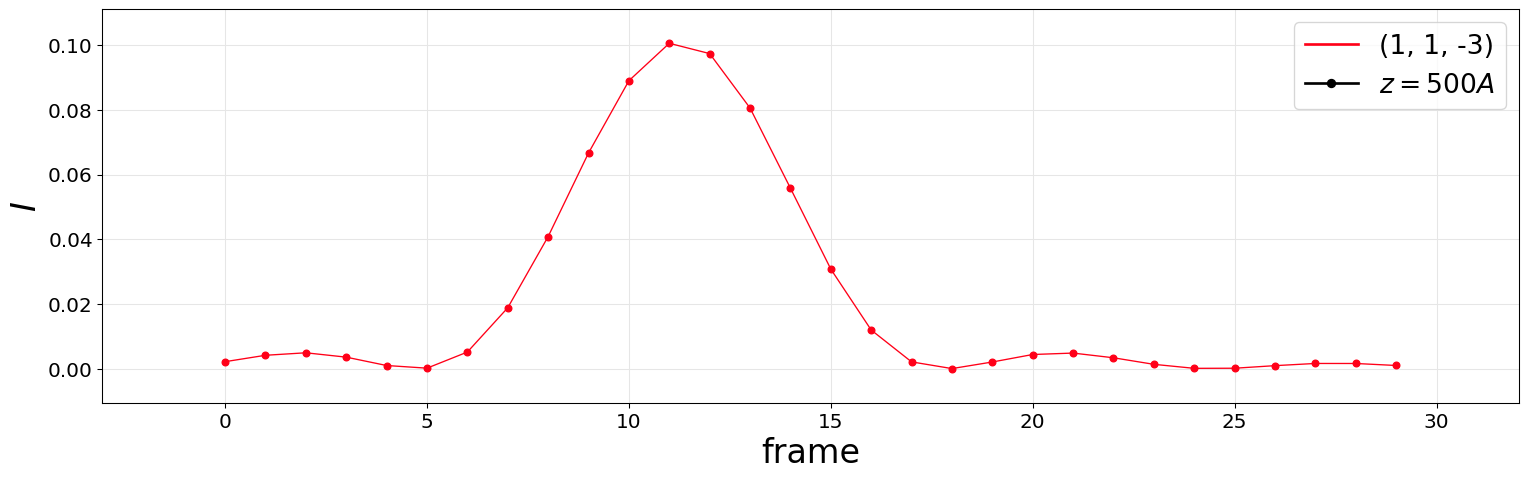

In [342]:
rock_two.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)
rock_two.plot_rocking(refl=hkl[[1]],zs=[500],cmap='hsv',kin=False,figsize=figs,
                  #xylims=['x',-0.003,0.003],
                  x='Frame',opt='',opts='F')

total number of beams:2


(<Figure size 1728x480 with 1 Axes>, <Axes: xlabel='frame', ylabel='$I$'>)

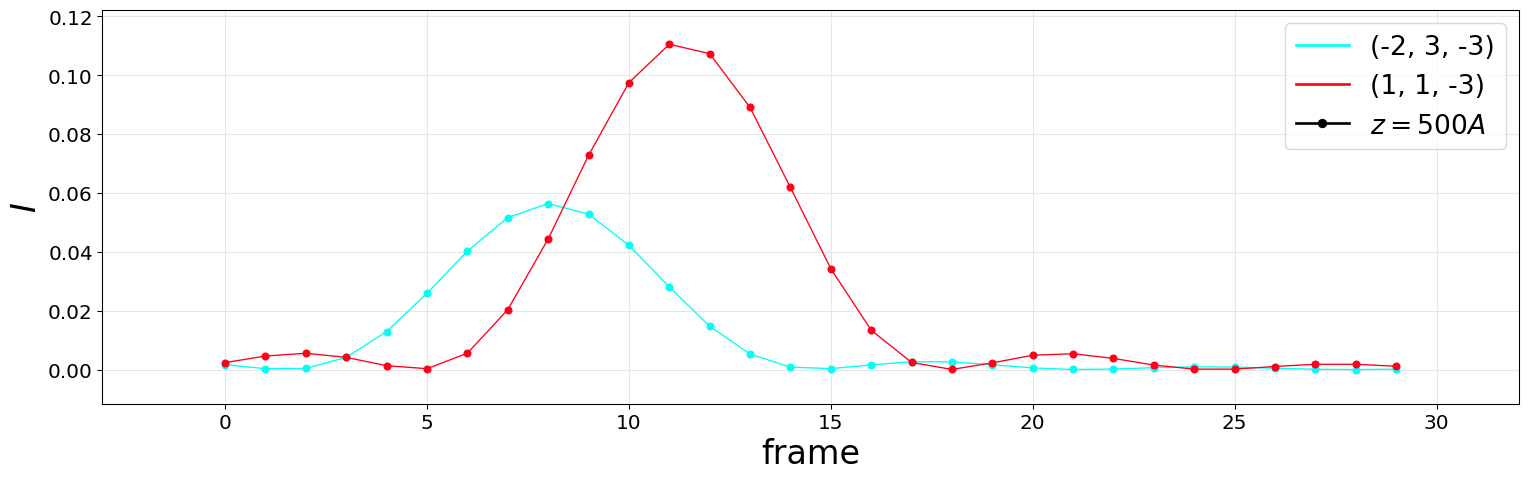

In [345]:
rock_three.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)
rock_three.plot_rocking(refl=hkl[1:3],zs=[500],cmap='hsv',kin=False,figsize=figs,
                  #xylims=['x',-0.003,0.003],
                  x='Frame',opt='',opts='F')

total number of beams:1


(<Figure size 1728x480 with 1 Axes>, <Axes: xlabel='frame', ylabel='$I$'>)

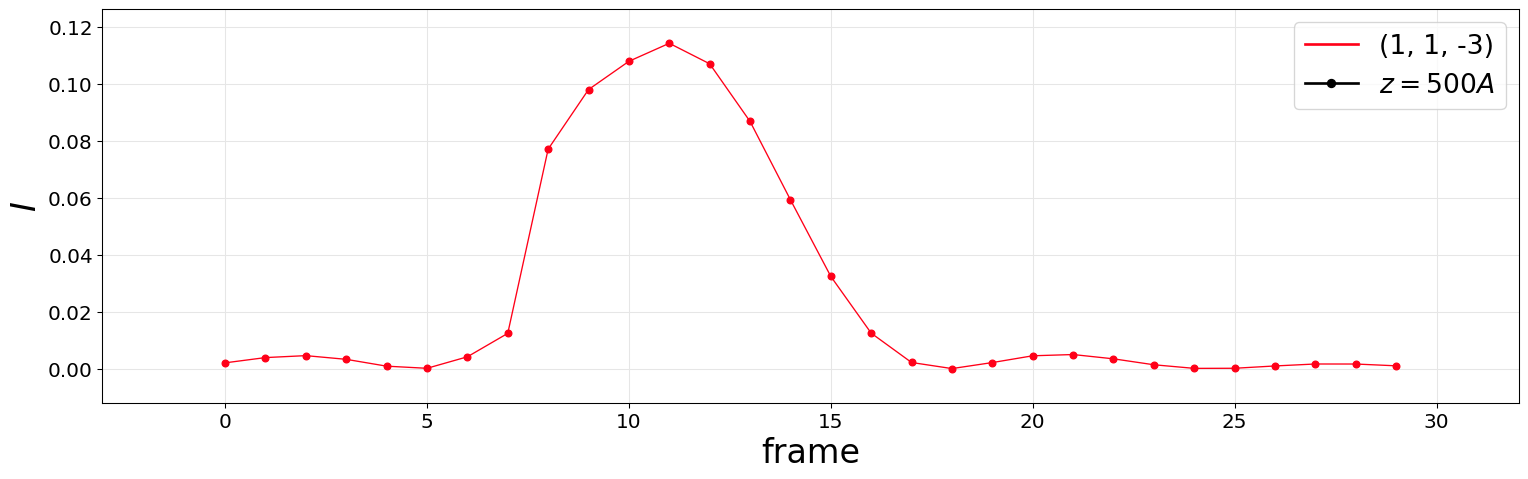

In [366]:
rock_bethe_three.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)
rock_bethe_three.plot_rocking(refl=hkl[[1]],zs=[500],cmap='hsv',kin=False,figsize=figs,
                  #xylims=['x',-0.003,0.003],
                  x='Frame',opt='',opts='F')

total number of beams:1
total number of beams:1
total number of beams:1
Saving figure :
figs/2beam_1weak_rock.png


(<Figure size 1728x480 with 1 Axes>, <Axes: xlabel='Frame', ylabel='I'>)

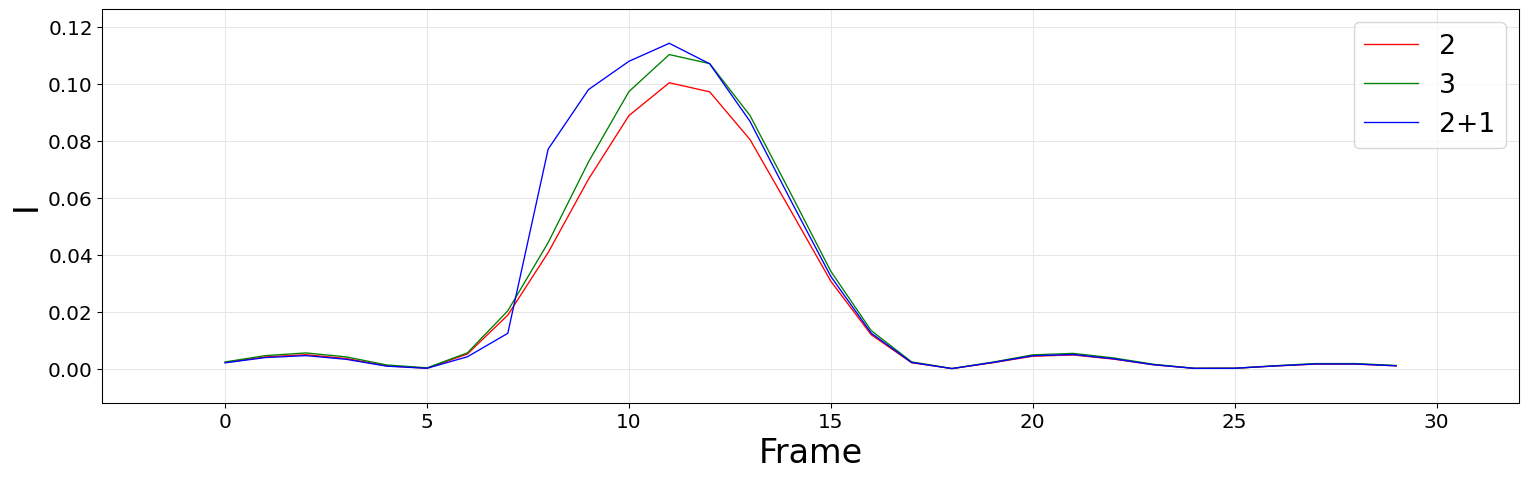

In [36]:
hg = str((1,1,-3))
plts=[]
cs='rgb'#dsp.getCs('jet',5)
frames=np.arange(rock_bethe_three.n_simus)
z,Iz=rock_two.get_rocking(refl=[hg],zs=[500])        ;plts+=[[frames,Iz[hg],[cs[0],'-'],'2']]
z,Iz=rock_three.get_rocking(refl=[hg],zs=[500])      ;plts+=[[frames,Iz[hg],[cs[1],'-'],'3']]
z,Iz=rock_bethe_three.get_rocking(refl=[hg],zs=[500]);plts+=[[frames,Iz[hg],[cs[2],'-'],'2+1']]

dsp.stddisp(plts,labs=['Frame','I'],
            # xylims=['y',-1e-1,1e-1],
            figsize=figs,name="figs/2beam_1weak_rock.png",opt='s')

### Perturbation strength evolution

Saving figure :
figs/rock_bethe_Ugeff.png


(<Figure size 1728x576 with 1 Axes>, <Axes: xlabel='Frame'>)

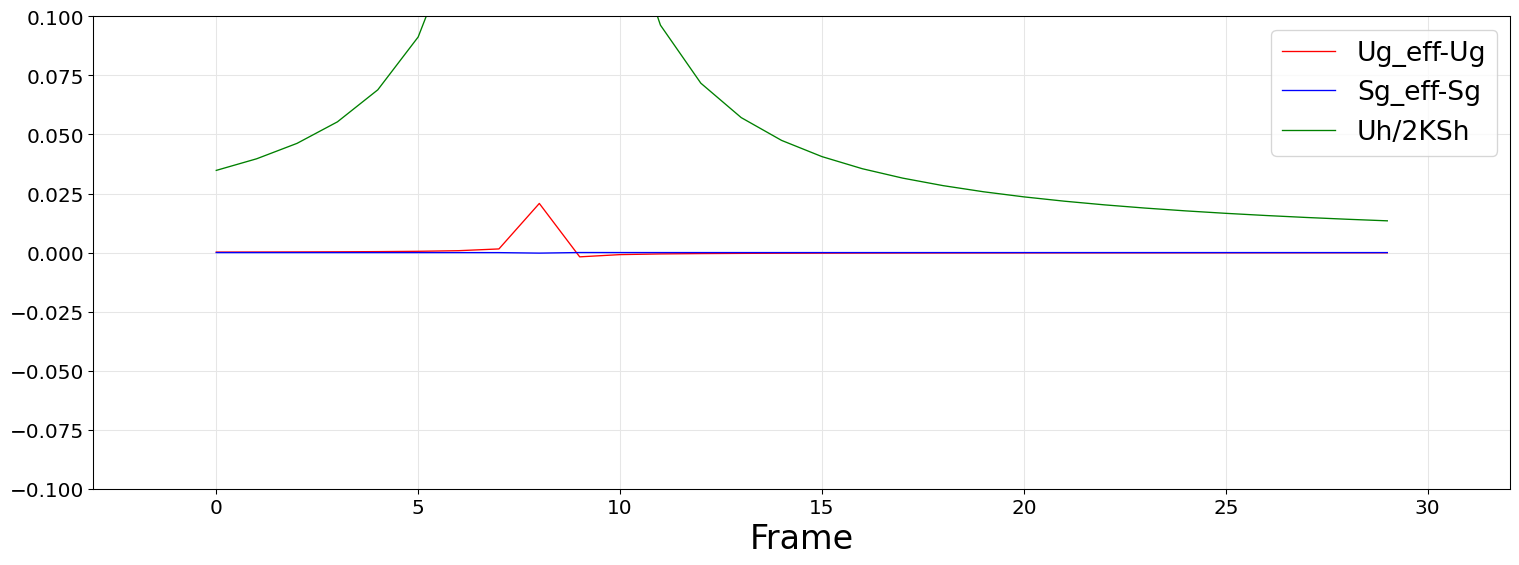

In [38]:
hg = str((1,1,-3))
df_three = pd.concat([rock_bethe_three.load(i).df_G.loc[[hg],['Ug','Ug_eff','Sw','Sg_eff']] for i in range(rock_bethe_three.n_simus)])
df_three.index=np.arange(rock_bethe_three.n_simus)

hh = str((-2,3,-3))
df_weak = pd.concat([rock_bethe_three.load(i).df_G.loc[[hh],['Sw','Ug/2KSg']] for i in range(rock_bethe_three.n_simus)])
df_weak.index=np.arange(rock_bethe_three.n_simus)

# plts=[[df_three.index,np.real(df_three[col]),c,col] for col,c in zip(df_three.columns,['r-','r--','b-','b--'])]
plts=[[df_three.index,np.real(df_three.Ug_eff-df_three.Ug),'r','Ug_eff-Ug']]
plts+=[[df_three.index,np.real(df_three.Sg_eff-df_three.Sw),'b','Sg_eff-Sg']]
plts+=[[df_three.index,df_weak['Ug/2KSg'],'g','Uh/2KSh']]
dsp.stddisp(plts,labs=['Frame',''],
            xylims=['y',-1e-1,1e-1],
            figsize=figs,name="figs/rock_bethe_Ugeff.png",opt="s")


In [32]:
# rock_bethe_three.load(0).df_G.columns
b_bethe = rock_bethe_three.load(11)
print(b_bethe.df_G[['Sw','Sg_eff','Ug','Ug_eff','Ug/2KSg','strong']].to_string())
Sg_eff=b_bethe.df_G.Sg_eff
print('Sg_pert=%.2E' %(np.real(Sg_eff.loc[str((1,1,-3))] - Sg_eff.loc[str((0,0,0))])))
print('Sg=%.2E' %np.real(b_bethe.df_G.loc[str((1,1,-3)),'Sw']))

                       Sw              Sg_eff                  Ug              Ug_eff       Ug/2KSg strong
(0, 0, 0)   -5.702381e-15  0.000008+0.000000j  0.000000+0.000000j  0.000655+0.000000j  1.358444e+11   True
(1, 1, -3)   8.799635e-05  0.000094+0.000000j -0.008218+0.000000j -0.008787-0.000000j  1.171017e+00   True
(-2, 3, -3) -8.860617e-04  0.000000+0.000000j -0.006804-0.000000j  0.000000+0.000000j  9.628856e-02  False
Sg_pert=8.60E-05
Sg=8.80E-05


## Perturbation strength